# Run install's 
- Incase kernel is different you need to run the packages again. Below code will install all the packages in the Requirments.txt file

In [1]:
!pip install -r Requirements.txt
!pip uninstall -y pypdf
!pip install --upgrade fpdf2

# Import relevant libraries

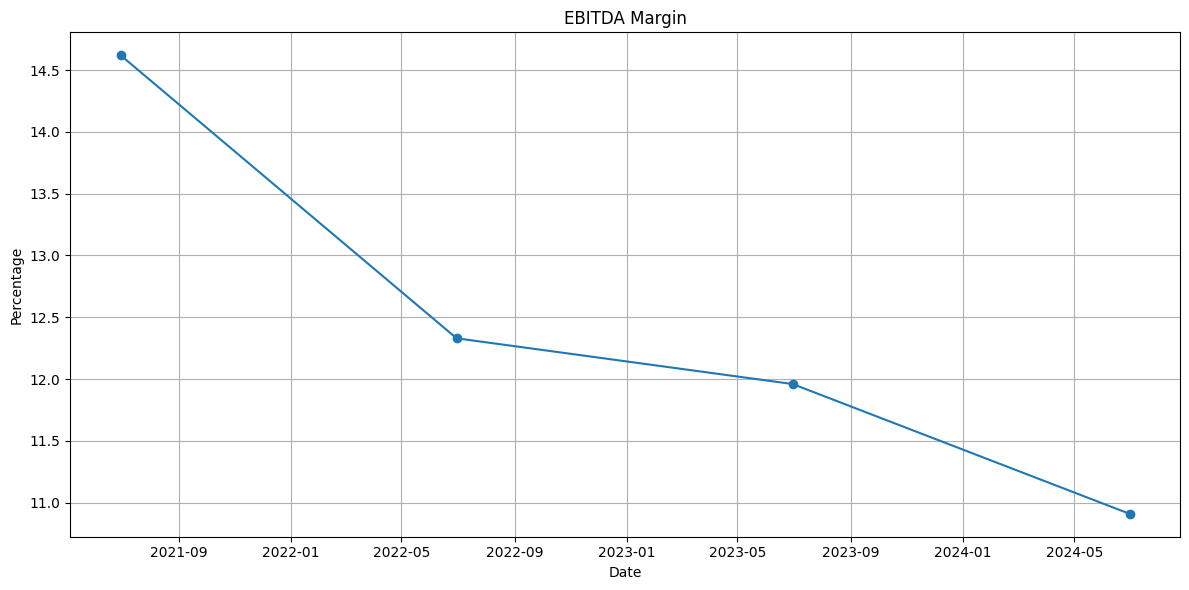

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fpdf/__init__.py:40: UserWarning: You have both PyFPDF & fpdf2 installed. Both packages cannot be installed at the same time as they share the same module namespace. To only keep fpdf2, run: pip uninstall --yes pypdf && pip install --upgrade fpdf2
  warnings.warn(


In [2]:

import sys
sys.path.append('./Financials_metrics')  #this tells Jupyter to look inside your "Financials metrics" folder

import Application_API as app_API
import financial_metric_graph as ratio_graphs
from fpdf import FPDF
import os
#from Financials_metrics import Application_API
#Everyone please import your libaries here






# Error warning 

If this reads error (UserWarning:...) please re-run first two code blocks and it will fix it. 

# Define variables

In [3]:

stock_data = app_API.generate_stock_information("RHC.AX")
print(stock_data["ticker"])


RHC.AX


# Create equity research PDF

In [117]:
# Add a header to the PDF
class PDF(FPDF):
    def header(self):
        #logo
        self.image('group41_logo2.png',10,8,25)
        # font
        self.set_font('Arial','B',10)
        #title
        self.cell(0,10, 'Equity research report', border=False, ln=1, align='C')
        #line break
        self.ln(20)

    # Add page footer
    def footer(self):
        # Position 15mm from bottom
        self.set_y(-15)
        self.set_font('Arial','I',8)
        # Page number
        self.cell(0,10,f'Page {self.page_no()}', align='C')



# Create a PDF object
pdf = PDF(orientation='P', unit='mm', format='A4')

# Set auto page breaks
pdf.set_auto_page_break(auto=True, margin=15)
# First page - Intro/RHC snapshot
pdf.add_page()

# Title
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, f'{stock_data["ticker"]} Equity research report', 0, 1, 'C')
pdf.ln(2)
x_start = pdf.get_x()
y_start = pdf.get_y()
pdf.line(10, y_start, 200, y_start)  # (adjust 10 and 200 as left/right margins)
pdf.ln(10)  # Move cursor a bit down after the line





# RHC summary 
# Summary heading 
pdf.set_x(20)
start_y = pdf.get_y()  # Capture current Y position

pdf.set_font('Arial', 'B', 14)
pdf.cell(60, 5, 'Company Summary', 0, 0, 'L')  # no line break
heading_end_x = pdf.get_x()  # Save the X where heading ends

# Add a small label or stat on the same line
pdf.set_font('Arial', 'B', 12)
pdf.set_y(start_y)
pdf.set_x(heading_end_x + 84)  # slight spacing after heading
pdf.cell(40, 5, 'Analysts ', 0, 1, 'L')  # now prints on same line
line_start_x = heading_end_x + 75
line_end_x = line_start_x + 40
pdf.line(line_start_x, start_y + 7, line_end_x, start_y + 7)  # adjust +6 if needed
# Store current Y before analyst block
y_before_analysts = pdf.get_y()

# --- Right Column: Analysts ---
pdf.set_y(start_y + 12)
pdf.set_x(heading_end_x + 80)
pdf.set_font('Arial', '', 10)
pdf.multi_cell(70, 5, "Charlotte Xu\nHuzaifah Koya\nMaryem Al-Ali\nJackson Herman", 0, 'L')
# Right column: date of report
pdf.set_y(pdf.get_y() + 4)  # add spacing below last name
pdf.set_x(heading_end_x + 78)  # align with Analysts column

# Add new subheading Equity analysis
pdf.set_font('Arial', 'B', 12)
pdf.cell(40, 5, 'Equity analysis', 0, 1, 'L')  # feel free to change title

# Optional: underline it
line_start_x = heading_end_x + 75
line_end_x = line_start_x + 40
pdf.line(line_start_x, pdf.get_y()+2, line_end_x, pdf.get_y()+2)

# Now add any related text under that
pdf.set_y(pdf.get_y() + 4)
pdf.set_font('Arial', '', 8)
pdf.set_x(heading_end_x + 80)
pdf.multi_cell(70, 5, "ASX filings\nBloomberg Terminal", 0, 'L')  # example lines






# Restore Y to where we left off before analysts
pdf.set_y(y_before_analysts + 10)  # Add some spacing if needed


pdf.ln(2)
# Pull summary from txt file 
with open("RHC_Summary.txt", "r") as file:
    summary = file.read()
print(summary)
pdf.set_left_margin(20)
pdf.set_right_margin(20)
pdf.set_x(20)

pdf.set_font('Arial', '', 10)
pdf.multi_cell(125, 7, summary, 0, 'J')
pdf.ln(1)
#pdf.output("Title.PDF")






# Implement price performance graph
pdf.set_font('Arial', 'B', 16)
pdf.cell(100, 20, 'Price performance', 0, 1, 'L')
pdf.ln(5)


# Add an image


   
    


# back up page 1
pdf.add_page()

# Add an image
performance_image = 'ebitda_margin_plot.png'
if os.path.exists(performance_image):
    # Save current cursor positions
    x_start = pdf.get_x()
    y_start = pdf.get_y()

    # Insert the image
    pdf.image(performance_image, x=x_start, y=y_start, w=60)

    # Move cursor to right of image
    pdf.set_xy(x_start + 65, y_start)

    # Read the price performance text from file
    with open('price_performance_summary.txt', 'r') as file:
        performance_text = file.read()

    # Write text next to image
    narrow_width = pdf.w - (x_start + 70) - pdf.r_margin
    pdf.set_font('Arial', '', 10)
    pdf.multi_cell(narrow_width, 5, performance_text)

    # Adjust Y position AFTER text
    current_y = pdf.get_y()
    image_height = 60  # Same as image

    # Move cursor down if text is shorter than image
    if current_y < y_start + image_height:
        pdf.set_y(y_start + image_height - 10)
    else:
        pdf.set_y(y_start + image_height - 10) 

    # Add snapshot table
    pdf.set_fill_color(230, 230, 230)  # Light grey
    pdf.set_font('Arial', 'B', 8)
    col1_width = 20
    col2_width = 20
    row_height = 6

    pdf.cell(col1_width, row_height, 'Ticker', border=1, align='L', fill=True)
    pdf.cell(col2_width, row_height, 'RHC.AX', border=1, align='L', fill=False)
    pdf.ln(row_height)

    pdf.cell(col1_width, row_height, 'Share price', border=1, align='L', fill=True)
    pdf.cell(col2_width, row_height, f"{stock_data['last_price']}", border=1, align='L', fill=False)
    pdf.ln(row_height + 5)





# Page 2 Financial performance
pdf.add_page()


# Title
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Financial Performance', 0, 1, 'C')
pdf.ln(15)

# Define financial metrics to include
financial_metrics = [
    ('D/E ratio', 'debt_equity'),
    ('Share price($)', 'last_price'),
    ('ROE', 'roe'),
    ('Dividend yield', 'dividend_yield'),
    ('EPS($)', 'eps'),
    ('EV/EBITDA', 'ev_ebitda'),
    ('P/E', 'pe_ratio'),
    ('EBITA Margin', 'ebitda_margin')

]

# Table settings
pdf.set_fill_color(230, 230, 230)  # Light grey
pdf.set_font('Arial', '', 8)
col_width = pdf.w / 8.5
row_height = 5

# Draw table rows
for label, key in financial_metrics:
    pdf.set_font('Arial', 'B', 8)
    pdf.cell(col_width, row_height, label, 1, 0, 'L', fill=True)
    pdf.set_font('Arial', '', 8)
    pdf.cell(col_width, row_height, f"{stock_data[key]}", 1, 1, 'L', fill=False)

pdf.ln(5)

pdf.set_auto_page_break(auto=False)
from fpdf import FPDF
import os

#Page 3
pdf.add_page()

# Shift All Content Down 
top_offset = 25  # 15 (original top) + 10 extra = 25mm

# Main Title
pdf.set_xy(10, top_offset)
pdf.set_font("Arial", "B", 14)
pdf.set_text_color(92, 64, 51)  # Brown
pdf.cell(0, 10, "Financial Valuation (ASX:RHC)", ln=True)

# Financial Summary Heading (Black, Arial 12) 
summary_heading_y = top_offset + 12
pdf.set_xy(10, summary_heading_y)
pdf.set_font("Arial", "B", 12)
pdf.set_text_color(0, 0, 0)
pdf.cell(0, 10, "Financial Summary", ln=True)

#  Financial Summary Text (Left Column) 
summary_text_y = summary_heading_y + 10
pdf.set_xy(10, summary_text_y)
pdf.set_font("Arial", "", 10)
pdf.set_text_color(0, 0, 0)

# Read content
with open('Financials summary.txt', 'r') as file:
    performance_text = file.read()

# Width for the left text column
text_width = 90  # Adjust as needed
pdf.multi_cell(text_width, 5, performance_text)

#  Image (Right Column) 
performance_image = 'ebitda_margin_plot.png'
x_image = 110  # Start image on the right
y_image = summary_heading_y + 5  # Align with text heading or slightly below

if os.path.exists(performance_image):
    pdf.image(performance_image, x=x_image, y=y_image, w=85)

# === NOW move to DCF heading, below the previous paragraph ===
summary_heading_d = pdf.get_y() + 10  # dynamically position after text
pdf.set_xy(10, summary_heading_d)
pdf.set_font("Arial", "B", 12)
pdf.set_text_color(0, 0, 0)
pdf.cell(0, 10, "DCF", ln=True)

# DCF Summary Text
summary_text_d = pdf.get_y() + 5  # just below "DCF"
pdf.set_xy(10, summary_text_d)
pdf.set_font("Arial", "", 10)
pdf.set_text_color(0, 0, 0)

# Read and clean content BEFORE using it in the PDF
with open('DCF commentary.txt', 'r') as file:
    performance_text = file.read()

# Fix fancy Unicode characters BEFORE using in PDF
performance_text = performance_text.replace('’', "'").replace('–', '-')








# === Export PDF ===
pdf.output("Title_23.PDF")

Ramsay Health Care is a leading global private healthcare operator, headquartered in Sydney, Australia. Founded in 1964, the company has grown to become one of the largest and most respected private hospital groups in the world, with operations across Australia, Europe, and Asia. Ramsay provides a broad range of healthcare services, including surgical procedures, mental health care, rehabilitation, and primary care. In Australia, Ramsay operates over 70 hospitals and day surgery units, maintaining a dominant position in the private hospital sector. Internationally, the company has expanded through acquisitions, notably becoming a major player in France and the United Kingdom healthcare markets, as well as holding interests in Asia through partnerships.




/var/folders/km/753p6wvd005_9lk8475wv13m0000gn/T/ipykernel_33328/823294959.py:7: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial','B',10)
/var/folders/km/753p6wvd005_9lk8475wv13m0000gn/T/ipykernel_33328/823294959.py:9: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0,10, 'Equity research report', border=False, ln=1, align='C')
/var/folders/km/753p6wvd005_9lk8475wv13m0000gn/T/ipykernel_33328/823294959.py:32: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 16)
/var/folders/km/753p6wvd005_9lk8475wv13m0000gn/T/ipykernel_33328/823294959.py:33: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, f'{stock_data[

FileNotFoundError: [Errno 2] No such file or directory: 'DCF commentary.txt'

In [114]:
print(stock_data['last_price'])
print(stock_data['market_cap'])
print(stock_data['debt_equity'])
print(stock_data['roe'])
print(stock_data['pe_ratio'])


33.69
7776662528
223.34
19.63
8.75


In [115]:
import os
print(os.getcwd())


/Users/maryemal-ali/Downloads/Equity_Research_FINM-44774669ad3244fe0323502e64f5c53420f69ced
